In [462]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import datetime
# pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [463]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [464]:
import glob

def allfilesinpath(path):
    """
    Get all files in a directory specified by the path.

    Args:
        path (str): The path of the directory.

    Returns:
        A list of all files in the directory.
    """
    # Create a list of all files in the specified path
    all_files = glob.glob(path + "/*")
  
    return all_files


In [465]:
path = '/content/drive/MyDrive/Financial Derivatives/Basix Case'
all_files_list = allfilesinpath(path)
all_files_list

['/content/drive/MyDrive/Financial Derivatives/Basix Case/BASIX_questions.pdf',
 '/content/drive/MyDrive/Financial Derivatives/Basix Case/Exhibit6_data.xlsx']

In [466]:
# Function to read a csv file
def read_excel_file(file_path):
    try:
        # use pandas to read the Excel file at the given path
        df = pd.read_excel(file_path)
        return df
    except FileNotFoundError:
        print(f"File not found at path: {file_path}")


In [467]:
file_path = '/content/drive/MyDrive/Financial Derivatives/Basix Case/Exhibit6_data.xlsx'
df = read_excel_file(file_path)

In [468]:
df

,Year,Phase 1,Phase 2,Phase 3
0,1970,108.0,430.0,201.0
1,1971,60.0,273.0,182.0
2,1972,256.0,88.0,121.0
3,1973,166.0,360.0,145.0
4,1974,79.0,261.0,336.0
5,1975,168.0,309.0,322.0
6,1976,250.0,520.0,124.0
7,1977,200.0,270.0,294.0
8,1978,94.0,574.0,403.0
9,1979,131.0,183.0,342.0


### Question 1

In [547]:
# This function calculates the payoff.
def calculate_payout(df,new_order):
    # Define the policy parameters
    policy_params = {
        'Phase I': {'Period': 'Days 1-35', 'Normal Index': 60, 'Payment/mm of shortfall(Rs)': 10, 'Trigger for max': 20, 'Max payout': 1500},
        'Phase II': {'Period': 'Days 36-80', 'Normal Index': 100, 'Payment/mm of shortfall(Rs)': 15, 'Trigger for max': 50, 'Max payout': 2000},
        'Phase III': {'Period': 'Days 81-125', 'Normal Index': 75, 'Payment/mm of shortfall(Rs)': 15, 'Trigger for max': 50, 'Max payout': 2500}
    }

    # Create new columns for the policy payout for each phase
    df['Payout Phase 1'] = np.nan
    df['Payout Phase 2'] = np.nan
    df['Payout Phase 3'] = np.nan

    # Loop through each row in the DataFrame and calculate the policy payout for each phase
    for index, row in df.iterrows():
        phase1_rainfall = row['Phase 1']
        phase2_rainfall = row['Phase 2']
        phase3_rainfall = row['Phase 3']

        # Calculate the policy payout for each phase
        if pd.isna(phase1_rainfall):
            payout_phase1 = np.nan
        elif phase1_rainfall < policy_params['Phase I']['Trigger for max']:
            payout_phase1 = policy_params['Phase I']['Max payout']
        else:
            shortfall = policy_params['Phase I']['Normal Index'] - phase1_rainfall
            if shortfall > 0:
                payout_phase1 = shortfall * policy_params['Phase I']['Payment/mm of shortfall(Rs)']
            else:
                payout_phase1 = 0

        if pd.isna(phase2_rainfall):
            payout_phase2 = np.nan
        elif phase2_rainfall < policy_params['Phase II']['Trigger for max']:
            payout_phase2 = policy_params['Phase II']['Max payout']
        else:
            shortfall = policy_params['Phase II']['Normal Index'] - phase2_rainfall
            if shortfall > 0:
                payout_phase2 = shortfall * policy_params['Phase II']['Payment/mm of shortfall(Rs)']
            else:
                payout_phase2 = 0

        if pd.isna(phase3_rainfall):
            payout_phase3 = np.nan
        elif phase3_rainfall < policy_params['Phase III']['Trigger for max']:
            payout_phase3 = policy_params['Phase III']['Max payout']
        else:
            shortfall = policy_params['Phase III']['Normal Index'] - phase3_rainfall
            if shortfall > 0:
                payout_phase3 = shortfall * policy_params['Phase III']['Payment/mm of shortfall(Rs)']
            else:
                payout_phase3 = 0

        # Update the payout columns in the current row of the DataFrame
        df.at[index, 'Payout Phase 1'] = payout_phase1
        df.at[index, 'Payout Phase 2'] = payout_phase2
        df.at[index, 'Payout Phase 3'] = payout_phase3
    
    df = df.rename(columns={'Year ': 'Year'})
    # define new column order
    new_order = new_order

    # reorder the columns
    df = df.reindex(columns=new_order)

    df['Total Rainfall'] = df['Phase 1'] + df['Phase 2'] + df['Phase 3']
    
    # # Calculate the average for each row, excluding NaN values
    # df2['Average'] = df2.sum(axis=1, skipna=True) / df2.count(axis=1, skipna=True)

    return df


In [ ]:
# This function calculates the payoff.
def calculate_payout(df,new_order):
    # Define the policy parameters
    policy_params = {
        'Phase I': {'Period': 'Days 1-35', 'Normal Index': 60, 'Payment/mm of shortfall(Rs)': 10, 'Trigger for max': 20, 'Max payout': 1500},
        'Phase II': {'Period': 'Days 36-80', 'Normal Index': 100, 'Payment/mm of shortfall(Rs)': 15, 'Trigger for max': 50, 'Max payout': 2000},
        'Phase III': {'Period': 'Days 81-125', 'Normal Index': 75, 'Payment/mm of shortfall(Rs)': 15, 'Trigger for max': 50, 'Max payout': 2500}
    }

    # Create new columns for the policy payout for each phase
    df['Payout Phase 1'] = np.nan
    df['Payout Phase 2'] = np.nan
    df['Payout Phase 3'] = np.nan

    # Loop through each row in the DataFrame and calculate the policy payout for each phase
    for index, row in df.iterrows():
        phase1_rainfall = row['Phase 1']
        phase2_rainfall = row['Phase 2']
        phase3_rainfall = row['Phase 3']

        # Calculate the policy payout for each phase
        if pd.isna(phase1_rainfall):
            payout_phase1 = np.nan
        elif phase1_rainfall < policy_params['Phase I']['Trigger for max']:
            payout_phase1 = policy_params['Phase I']['Max payout']
        else:
            shortfall = policy_params['Phase I']['Normal Index'] - phase1_rainfall
            if shortfall > 0:
                payout_phase1 = shortfall * policy_params['Phase I']['Payment/mm of shortfall(Rs)']
            else:
                payout_phase1 = 0

        if pd.isna(phase2_rainfall):
            payout_phase2 = np.nan
        elif phase2_rainfall < policy_params['Phase II']['Trigger for max']:
            payout_phase2 = policy_params['Phase II']['Max payout']
        else:
            shortfall = policy_params['Phase II']['Normal Index'] - phase2_rainfall
            if shortfall > 0:
                payout_phase2 = shortfall * policy_params['Phase II']['Payment/mm of shortfall(Rs)']
            else:
                payout_phase2 = 0

        if pd.isna(phase3_rainfall):
            payout_phase3 = np.nan
        elif phase3_rainfall < policy_params['Phase III']['Trigger for max']:
            payout_phase3 = policy_params['Phase III']['Max payout']
        else:
            shortfall = policy_params['Phase III']['Normal Index'] - phase3_rainfall
            if shortfall > 0:
                payout_phase3 = shortfall * policy_params['Phase III']['Payment/mm of shortfall(Rs)']
            else:
                payout_phase3 = 0

        # Update the payout columns in the current row of the DataFrame
        df.at[index, 'Payout Phase 1'] = payout_phase1
        df.at[index, 'Payout Phase 2'] = payout_phase2
        df.at[index, 'Payout Phase 3'] = payout_phase3
    
    df = df.rename(columns={'Year ': 'Year'})
    # define new column order
    new_order = new_order

    # reorder the columns
    df = df.reindex(columns=new_order)

    df['Total Rainfall'] = df['Phase 1'] + df['Phase 2'] + df['Phase 3']
    
    # # Calculate the average for each row, excluding NaN values
    # df2['Average'] = df2.sum(axis=1, skipna=True) / df2.count(axis=1, skipna=True)

    return df


In [ ]:
new_order = ['Year','Phase 1','Payout Phase 1','Phase 2','Payout Phase 2','Phase 3','Payout Phase 3']
df2 = calculate_payout(df,new_order)

In [ ]:
# df2

In [470]:
df2.info()
# df2 = df2.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            37 non-null     int64  
 1   Phase 1         33 non-null     float64
 2   Payout Phase 1  33 non-null     float64
 3   Phase 2         32 non-null     float64
 4   Payout Phase 2  32 non-null     float64
 5   Phase 3         32 non-null     float64
 6   Payout Phase 3  32 non-null     float64
 7   Total Rainfall  32 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 2.4 KB


In [471]:
# number of days in each phase
days_in_each_phase = [35, 45, 45]

max_avg_rainfall_phase1 = 60/days_in_each_phase[0]
max_avg_rainfall_phase2 = 100/days_in_each_phase[0]
max_avg_rainfall_phase3 = 75/days_in_each_phase[0]

max_avg_rainfall_in_each_phase = [max_avg_rainfall_phase1,max_avg_rainfall_phase2,max_avg_rainfall_phase3]

min_avg_rainfall_phase1 = (60-20)/days_in_each_phase[0]
min_avg_rainfall_phase2 = (100-50)/days_in_each_phase[0]
min_avg_rainfall_phase3 = (75-50)/days_in_each_phase[0]

min_avg_rainfall_in_each_phase = [min_avg_rainfall_phase1,min_avg_rainfall_phase2,min_avg_rainfall_phase3]

avg_rain_phase1 = np.arange(0, max_avg_rainfall_in_each_phase[0], 0.1)
avg_rain_phase2 = np.arange(0, max_avg_rainfall_in_each_phase[1], 0.1)
avg_rain_phase3 = np.arange(0, max_avg_rainfall_in_each_phase[2], 0.1)

tot_rain_phase1 = days_in_each_phase[0]*avg_rain_phase1
tot_rain_phase2 = days_in_each_phase[1]*avg_rain_phase2
tot_rain_phase3 = days_in_each_phase[2]*avg_rain_phase3


In [472]:
# Create a Series object from the first array
phase1_rain = pd.Series(tot_rain_phase1, name='Phase 1')

# Concatenate the Series with the other arrays
rainfall = pd.concat([phase1_rain, pd.Series(tot_rain_phase2, name='Phase 2'), pd.Series(tot_rain_phase3, name='Phase 3')], axis=1)

In [473]:
# rainfall

In [474]:
new_order = ['Year','Phase 1','Payout Phase 1','Phase 2','Payout Phase 2','Phase 3','Payout Phase 3']
rainfall = calculate_payout(rainfall,new_order)
# rainfall

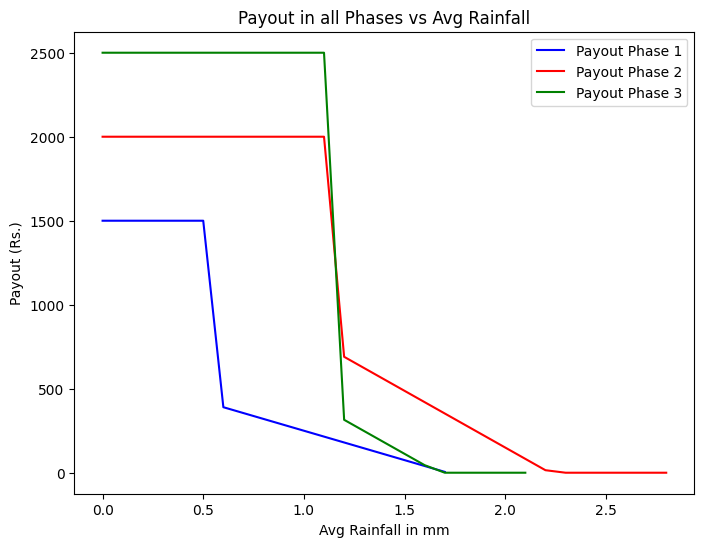

In [475]:
# Set fig size
fig, ax = plt.subplots(figsize=(8, 6))

rainfall['Phase 1'] = rainfall['Phase 1']/days_in_each_phase[0]
rainfall['Phase 2'] = rainfall['Phase 2']/days_in_each_phase[1]
rainfall['Phase 3'] = rainfall['Phase 3']/days_in_each_phase[2]

# Plot the 'Year' and 'Payout Phase 1' columns from the cleaned DataFrame
ax.plot(rainfall['Phase 1'], rainfall['Payout Phase 1'], label="Payout Phase 1", color='blue')
ax.plot(rainfall['Phase 2'], rainfall['Payout Phase 2'], label="Payout Phase 2", color='red')
ax.plot(rainfall['Phase 3'], rainfall['Payout Phase 3'], label="Payout Phase 3", color='green')

# ax.plot(X2, phase2_payoff, label="Payout Phase 2", color='red')
# ax.plot(X3, phase3_payoff, label="Payout Phase 3", color='green')

# Set the plot labels and title
ax.set_xlabel('Avg Rainfall in mm')
ax.set_ylabel('Payout (Rs.)')
ax.set_title('Payout in all Phases vs Avg Rainfall')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

There are several reasons why an insurance policy based on rainfall may be more suitable than insuring the output (castor nuts) directly:

- Risk management: Rainfall is a key factor in determining crop yields and quality, and is a major source of risk for farmers. By insuring rainfall, farmers are better protected against the financial impact of weather-related losses.
- Diversification of risk: Insuring the output (castor nuts) directly may expose the insurance company to a higher level of risk. A weather-based policy helps to diversify the risk across a larger number of farmers, reducing the impact of losses on any single policyholder.
- Simplicity and transparency: A weather-based policy is typically easier to administer and understand than one based on crop yields. There is no need for extensive crop monitoring or assessment of damage, which can be time-consuming and expensive.
- Cost effectiveness: Insuring the output (castor nuts) directly may require higher premiums due to the greater uncertainty and risk involved. A weather-based policy can be more cost-effective for farmers, while still providing adequate protection.
- Limited market for crop insurance: The market for crop insurance is relatively small in many developing countries, which can make it difficult for insurance companies to offer such policies. A weather-based policy can be more easily adapted to local conditions and market demands, making it a more viable option.

In summary, while insuring the output (castor nuts) may seem like a more intuitive approach to risk management, a weather-based policy can provide a more practical and cost-effective solution for farmers in many regions. It helps to manage risk, diversify exposure, and simplify the insurance process while ensuring that farmers receive adequate protection against the financial impact of weather-related losses.


### Question 2

In [476]:
# # phase_means = [303870.6038289055, 259499.32812930204, 280005.8461288757]
# phase_days = [35, 45, 45]
# num_days = sum(phase_days)
# M = [30] * 40 + [phase_means[0]] * phase_days[0] + [phase_means[1]] * phase_days[1] + [phase_means[2]] *


In [647]:
from scipy.stats import norm

def calculate_phase_means(df):
  # Drop any rows with missing values fror rainfall in all the phases
  df_cleaned = df.dropna(subset=['Phase 1', 'Phase 2', 'Phase 3'])

  # Calculate the means of the three phases
  phase1_mean = df_cleaned['Phase 1'].mean()
  phase2_mean = df_cleaned['Phase 2'].mean()
  phase3_mean = df_cleaned['Phase 3'].mean()

  # Store the means in a NumPy array
  means_array = np.array([phase1_mean, phase2_mean, phase3_mean])

  return means_array
  
# Get the seasonal means from the dataframe
phase_mean = calculate_phase_means(df)

# Define the seasonal mean Mt for each phase
M = [30] * 40 + [phase_mean[0]] * 35 + [phase_mean[1]] * 45 + [phase_mean[2]] * 45

def simulate_rainfall_process(df, M, num_simulation, num_days, dt, initial_BM, sigma_val):

  # Define the initial price P0 and time step dt
  P0 = initial_BM

  # Define the sigma function sigma(t) for each phase
  def sigma(t):
    if t < 40:
      return sigma_val[0]
    elif t < 90:
      return sigma_val[1]
    elif t <= 165:
      return sigma_val[2]

  # Define the function to simulate the rainfall process
  def simulate_rainfall(M, sigma, P0, dt, num_days):
    # Initialize Pt and the Brownian motion
    P = np.empty(num_days)
    P[0] = P0

    W = np.empty(num_days)
    W[0] = 0

    # Simulate the Brownian motion and the price
    for t in range(1, num_days):
      # Brownian Motion
      dW = np.random.normal(0, np.sqrt(dt))
      dP = sigma(t) * P[t-1] * dW
      P[t] = P[t-1] + dP
      W[t] = W[t-1] + dW

    # Calculate the rainfall from the simulated price
    rainfall = [M[t] * P[t] for t in range(num_days)]

    return rainfall

  # Simulate the rainfall process and calculate the average rainfall in each phase
  averages = pd.DataFrame(columns=['Simulation', 'Day', 'Phase 1', 'Phase 2', 'Phase 3'])

  for i in range(num_simulations):
    rainfall = simulate_rainfall(M, sigma, P0, dt, num_days)
    phase1 = np.mean(rainfall[40:76])
    phase2 = np.mean(rainfall[76:121])
    phase3 = np.mean(rainfall[121:])
    
    sim_data = {'Simulation': i+1, 'Day': np.arange(1, num_days+1), 'Phase 1': phase1, 'Phase 2': phase2, 'Phase 3': phase3}
    sim_df = pd.DataFrame(sim_data)
    averages = pd.concat([averages, sim_df])

  averages = averages.groupby('Simulation').mean()
  averages = averages.reset_index(inplace=False)

  averages = round(averages,5)
  return averages



In [692]:
initial_BM = 1
num_simulations = 1500
dt = 1
days = 165
sigma_val = [0.07,0.04,0.03]
averages = simulate_rainfall_process(df, M, num_simulations, days, dt, initial_BM, sigma_val)
# averages

In [693]:
averages

,Simulation,Phase 1,Phase 2,Phase 3
0,1,337.61899,756.05568,480.43456
1,2,76.40808,116.34307,78.66702
2,3,98.58018,174.08197,136.10847
3,4,86.80633,180.27872,131.56879
4,5,202.39864,320.80742,301.80296
...,...,...,...,...
1495,1496,85.75145,144.26341,132.23515
1496,1497,298.29424,616.85430,432.20975
1497,1498,139.27944,365.51470,274.32457
1498,1499,187.16095,280.70916,189.82692


In [694]:
total_count_zeros = averages.size - np.count_nonzero(averages)
print("Total count of 0 values:", total_count_zeros)

Total count of 0 values: 0


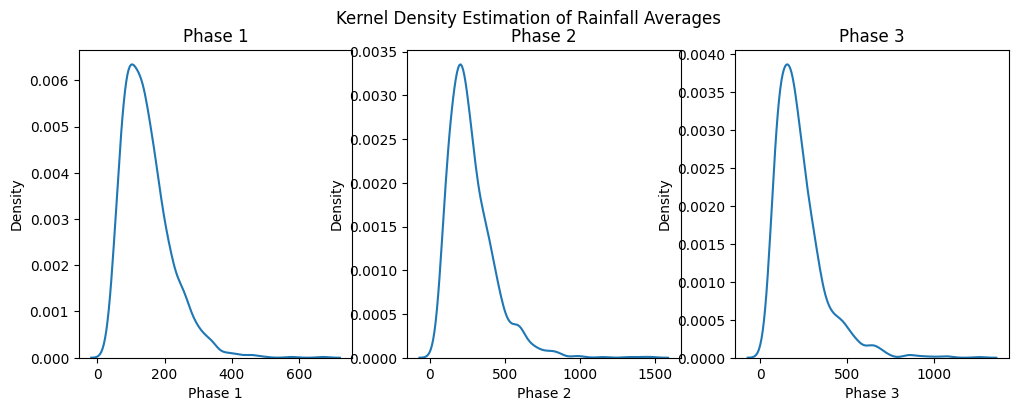

In [695]:
import seaborn as sns

# Create subplots for each phase
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot KDE for Phase 1
sns.kdeplot(data=averages['Phase 1'], ax=axes[0])
axes[0].set_title('Phase 1')

# Plot KDE for Phase 2
sns.kdeplot(data=averages['Phase 2'], ax=axes[1])
axes[1].set_title('Phase 2')

# Plot KDE for Phase 3
sns.kdeplot(data=averages['Phase 3'], ax=axes[2])
axes[2].set_title('Phase 3')

# Set the overall title for the plot
fig.suptitle('Kernel Density Estimation of Rainfall Averages')

# Display the plot
plt.show()

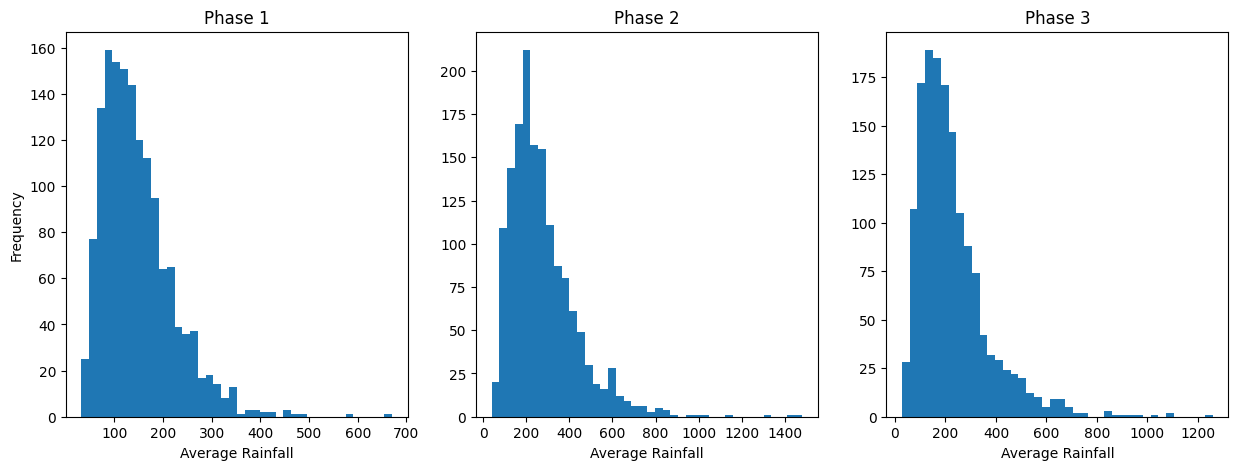

In [696]:
# Create histograms for each column
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].hist(averages['Phase 1'], bins=40)
axs[1].hist(averages['Phase 2'], bins=40)
axs[2].hist(averages['Phase 3'], bins=40)

# Add titles and axis labels
axs[0].set_title('Phase 1')
axs[1].set_title('Phase 2')
axs[2].set_title('Phase 3')
axs[0].set_xlabel('Average Rainfall')
axs[1].set_xlabel('Average Rainfall')
axs[2].set_xlabel('Average Rainfall')
axs[0].set_ylabel('Frequency')
plt.show()


In [697]:
# Calculate standard deviation of each column
sd_phase1 = np.std(df['Phase 1'])
sd_phase2 = np.std(df['Phase 2'])
sd_phase3 = np.std(df['Phase 3'])

# Print the standard deviation of each column
print('Phase 1 standard deviation:', sd_phase1)
print('Phase 2 standard deviation:', sd_phase2)
print('Phase 3 standard deviation:', sd_phase3)

Phase 1 standard deviation: 80.14172478443001
Phase 2 standard deviation: 124.81522280455216
Phase 3 standard deviation: 102.68922605822628


In [698]:
# Calculate standard deviation of each column
sd_phase1 = np.std(averages['Phase 1'])
sd_phase2 = np.std(averages['Phase 2'])
sd_phase3 = np.std(averages['Phase 3'])

# Print the standard deviation of each column
print('Phase 1 standard deviation:', sd_phase1)
print('Phase 2 standard deviation:', sd_phase2)
print('Phase 3 standard deviation:', sd_phase3)

Phase 1 standard deviation: 72.52040519396056
Phase 2 standard deviation: 157.81597359990346
Phase 3 standard deviation: 142.09293030465744


After trial and error, this is the closest we could arrive at sigma values.


In [706]:
print("Sigma for Phase 1: ",sigma_val[0])
print("Sigma for Phase 2: ",sigma_val[1])
print("Sigma for Phase 3: ",sigma_val[2])

Sigma for Phase 1:  0.07
Sigma for Phase 2:  0.04
Sigma for Phase 3:  0.03


### Question 3

he numbers in the code correspond to the time-weighted average of the payout period for each phase. The payout period is the number of days from the end of the phase to the date of payment, which is assumed to be 30 days after the end of each phase.

For example, in Phase 1, the payout is made for days 1-35, which ends on day 35. The payout is assumed to be made 30 days after the end of the phase, so the present value calculation is based on a time period of 65 days (35 days of phase 1 + 30 days until payout). The time-weighted average of the payout period is (35+95)/2 = 65 days, which is used in the present value calculation.

Similarly, for Phase 2, the payout period is days 36-80, which ends on day 80. The payout is assumed to be made 30 days after the end of the phase, so the present value calculation is based on a time period of 110 days (80 days of phase 2 + 30 days until payout). The time-weighted average of the payout period is (80+150)/2 = 115 days, which is used in the present value calculation.

Finally, for Phase 3, the payout period is days 81-125, which ends on day 125. The payout is assumed to be made 30 days after the end of the phase, so the present value calculation is based on a time period of 155 days (125 days of phase 3 + 30 days until payout). The time-weighted average of the payout period is (125+235)/2 = 180 days, which is used in the present value calculation

In [702]:
from scipy.stats import norm

def simulate_rainfall_process(df, M, num_simulation, num_days, dt, initial_BM, sigma_val, lambda_rain):

  # Define the initial price P0 and time step dt
  P0 = initial_BM

  # Define the sigma function sigma(t) for each phase
  def sigma(t):
    if t < 40:
      return sigma_val[0]
    elif t < 90:
      return sigma_val[1]
    elif t <= 165:
      return sigma_val[2]

  # Define the function to simulate the rainfall process
  def simulate_rainfall(M, sigma, P0, dt, num_days, lambda_rain):
    # Initialize Pt and the Brownian motion
    P = np.empty(num_days)
    P[0] = P0

    W = np.empty(num_days)
    W[0] = 0

    # Simulate the Brownian motion and the price
    for t in range(1, num_days):
      # Brownian Motion
      dW = np.random.normal(0, np.sqrt(dt))
      # dP = sigma(t) * P[t-1] * dW
      dP = sigma(t) * P[t-1] * dW - lambda_rain * sigma(t) * P[t-1] * dt
      P[t] = P[t-1] + dP
      W[t] = W[t-1] + dW

    # Calculate the rainfall from the simulated price
    rainfall = [M[t] * P[t] for t in range(num_days)]

    return rainfall

  # Simulate the rainfall process and calculate the average rainfall in each phase
  averages = pd.DataFrame(columns=['Simulation','Lambda', 'Day', 'Phase 1', 'Phase 2', 'Phase 3'])

  count = 0

  for j in range(len(lambda_rain_values)):
    for i in range(num_simulations):
      rainfall = simulate_rainfall(M, sigma, P0, dt, num_days, lambda_rain_values[j])
      phase1 = np.mean(rainfall[40:76])
      phase2 = np.mean(rainfall[76:121])
      phase3 = np.mean(rainfall[121:])
      
      sim_data = {'Simulation': i+1, 'Lambda': lambda_rain_values[j],'Day': np.arange(1, num_days+1), 'Phase 1': phase1, 'Phase 2': phase2, 'Phase 3': phase3}
      sim_df = pd.DataFrame(sim_data)
      sim_df = round(sim_df,5)
      averages = pd.concat([averages, sim_df])
    temp = averages.groupby('Simulation').mean()
    temp = temp.reset_index(inplace=False)

    new_order = ['Simulation','Lambda','Phase 1','Payout Phase 1','Phase 2','Payout Phase 2','Phase 3','Payout Phase 3']
    temp = calculate_payout(temp,new_order)
    
    if count == 0:
      output = temp
      count = count + 1
    else:
      output = pd.concat([output, temp])

  return output


In [848]:
initial_BM = 1
num_simulations = 3000
dt = 1
days = 165
sigma_val = [0.07,0.04,0.03]
lambda_rain_values = [0.106]
averages = simulate_rainfall_process(df, M, num_simulations, days, dt, initial_BM, sigma_val, lambda_rain_values)
# averages

In [849]:
averages['Lambda'].value_counts()
# averages

0.106    3000
Name: Lambda, dtype: int64

In [850]:
# averages

In [851]:
averages = averages.reset_index(drop=True)

In [852]:
def calculate_present_value(df, num_simulations, r):
    present_values = pd.DataFrame(columns=['Simulation', 'Present Value'])
    for i in range(num_simulations):
        # payout_data = df[df['Simulation'] == i+1]
        total_payout_phase1 = df['Payout Phase 1'][i]
        total_payout_phase2 = df['Payout Phase 2'][i]
        total_payout_phase3 = df['Payout Phase 3'][i]
        pv_phase1 = total_payout_phase1 / ((1 + r) ** 0.082191)
        pv_phase2 = total_payout_phase2 / ((1 + r) ** 0.205479)
        pv_phase3 = total_payout_phase3 / ((1 + r) ** 0.369863)

        present_value = (pv_phase1 + pv_phase2 + pv_phase3) / 3
        # df['present_value'] = np.nan
        # df['present_value'][i] = present_value

        present_values = pd.concat([present_values, pd.DataFrame({'Simulation': [i+1], 'Present Value': [present_value]})], ignore_index=True)

    return present_values


In [853]:
# averages

In [854]:
# initial_BM = 1
# num_simulations = 500
# dt = 1
# days = 165
# sigma_val = [0.07,0.04,0.06]
# lambda_rain_values = [0.1,0.2]
# averages = simulate_rainfall_process(df, M, num_simulations, days, dt, initial_BM, sigma_val, lambda_rain_values)
# averages = averages.reset_index(drop=True)

In [855]:
t = averages#[averages['Lambda']==lambda_rain_values[0]]
t

,Simulation,Lambda,Phase 1,Payout Phase 1,Phase 2,Payout Phase 2,Phase 3,Payout Phase 3,Total Rainfall
0,1,0.106,104.76629,0.0000,141.40483,0.0000,73.91123,16.33155,320.08235
1,2,0.106,80.66666,0.0000,97.42180,38.6730,72.93740,30.93900,251.02586
2,3,0.106,196.80161,0.0000,246.33238,0.0000,148.32486,0.00000,591.45885
3,4,0.106,68.96807,0.0000,105.78708,0.0000,71.54729,51.79065,246.30244
4,5,0.106,74.39204,0.0000,102.49685,0.0000,85.87324,0.00000,262.76213
...,...,...,...,...,...,...,...,...,...
2995,2996,0.106,29.45221,305.4779,33.08508,2000.0000,18.79276,2500.00000,81.33005
2996,2997,0.106,43.62198,163.7802,73.32538,400.1193,59.03984,239.40240,175.98720
2997,2998,0.106,109.26510,0.0000,109.71406,0.0000,61.84817,197.27745,280.82733
2998,2999,0.106,98.40430,0.0000,212.82837,0.0000,168.72533,0.00000,479.95800


In [856]:
r = 0.24
pv = calculate_present_value(t, num_simulations, r)

In [857]:
pv['Present Value'].mean()

153.8180331301842

In [837]:
# averages['Payout Phase 1'][0]